> # Chapter7 - Clustering and Dimension reduction
***

     U.S. News and World Report’s College Data

## U.S. News and World Report’s College Data with k-means Clustering

***cf)***  
일반적인 상황에서 k-means clustering 을 쓰는 이유는 '정답'이 없는 데이터, 즉 unsupervised learning 을 해야하기 때문입니다. <br>
정답이 없기 때문에 우리가 만든 model 의 성능을 파악하기란 매우 어렵습니다.  <br>
하지만 실제로 공부를 해보는 단계인 exercise 에서는 k-means 의 사용 뿐 아니라 성능까지 파악하여 모델이 clustering 을 얼마나 우수하게 하는지 알아 볼 필요가 있습니다.<br>
때문에 이번 U.S College Data 에서는 Private 과 public 을 임의로 구분하여 k-means 모델의 성능을 알아볼 것 입니다.

### Import library

In [9]:
import warnings
warnings.filterwarnings(action='ignore')

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [11]:
# index_col=0을 설정하면 대학교 이름이 row name으로 들어감
df = pd.read_csv("C:/data/College.csv",index_col=0)
df.head(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

데이터 파헤쳐보기

- 나머지 Feature들이 Public/Private에 영향을 주는가

일부를 제외하고는 사립 대학교가 기숙사 비용이 공립에 비해 높으며, 
그에 대한 보상인지는 모르겟지만, 졸업률 또한 더 높습니다


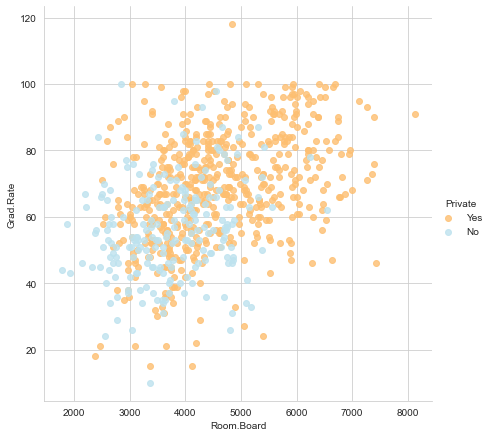

In [13]:
# sns.set_style('whitegrid')

# x,y -> 'Room.Board', 'Grad.Rate'
# 색깔 -> RdYlBu
# 그래프 크기 -> 6
# fit_reg = False 옵션을 주어 회귀선식(data에 대한 linear 식)을 나타내지 않도록 합니다.

sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df,hue='Private',palette='RdYlBu',size=6, fit_reg=False)

# 각각의 point는 하나의 학교를 나타내는 것
print("일부를 제외하고는 사립 대학교가 기숙사 비용이 공립에 비해 높으며, \n그에 대한 보상인지는 모르겟지만, 졸업률 또한 더 높습니다")

2. State 외 재학생 등록금 & Full time 학부생

공립대학교는 full time 학생의 수가 다양하게 분포되어 있으며 주외 거주민의 등록금 또한 사립에 비해 저렴합니다.


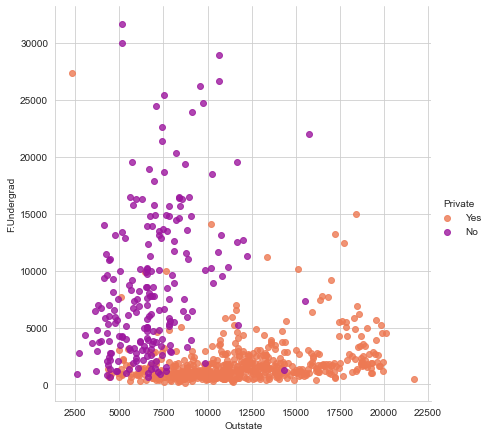

In [14]:
# x,y -> 'Outstate', 'F.Undergrad'
# 색깔 -> plasma_r

sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df,hue='Private',palette='plasma_r',size=6,fit_reg=False)

print("공립대학교는 full time 학생의 수가 다양하게 분포되어 있으며 주외 거주민의 등록금 또한 사립에 비해 저렴합니다.")

아래와 같이 사립 대학교의 등록금이 훨씬 비싼 것을 알 수 있습니다.


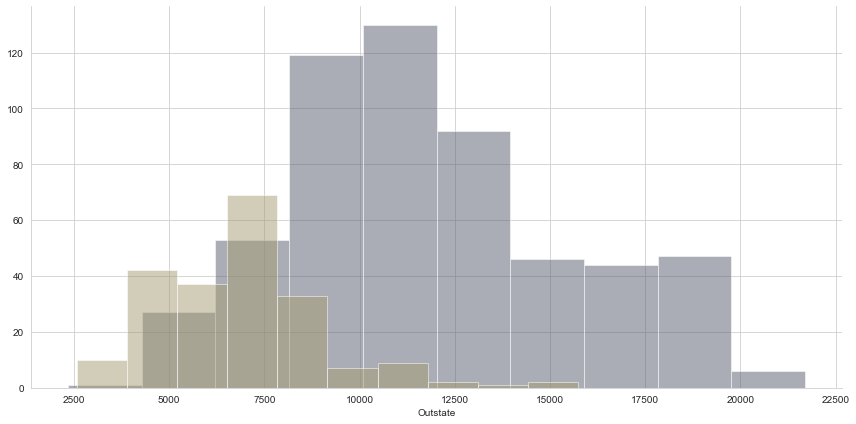

In [15]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='Private', palette='cividis', size=6, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=10, alpha=0.5)

print("아래와 같이 사립 대학교의 등록금이 훨씬 비싼 것을 알 수 있습니다.")

졸업률은 100%를 넘어갈 수가 없는데 120% 정도의 졸업률을 가진 학교가 있습니다. 이상치라고 생각하고 데이터의 값을 고쳐주거나 삭제해야합니다.


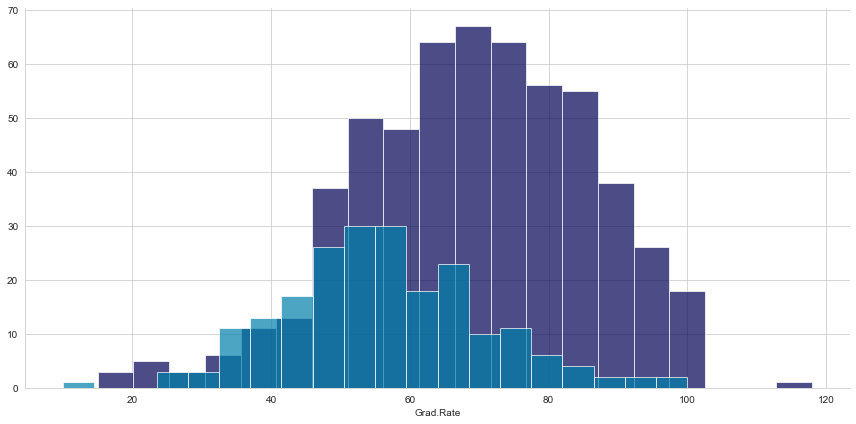

In [16]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df,hue="Private",palette='ocean',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

print("졸업률은 100%를 넘어갈 수가 없는데 120% 정도의 졸업률을 가진 학교가 있습니다. 이상치라고 생각하고 데이터의 값을 고쳐주거나 삭제해야합니다.")

In [17]:
# 졸업률을 100으로 수정
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [18]:
df.loc[df['Grad.Rate']>100,'Grad.Rate'] = 100
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


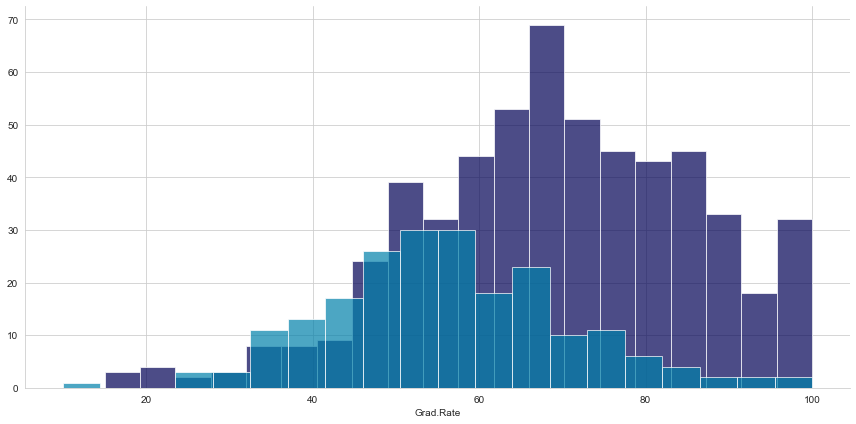

In [19]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df,hue="Private",palette='ocean',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

K means Cluster

In [20]:
from sklearn.cluster import KMeans

Private or Public으로 구분 지울 것이기 때문에 클러스터 갯수는 2개로 설정

In [21]:
kmeans = KMeans(n_clusters=2)

Private 그룹을 제외한 나머지 feature들로 군집분석 시행
클러스터 갯수는 2개로 설정되었으므로 군집분석이 제대로 이루어 진다면 2개의 군집으로 나누어져야 하고 그 군집은 각각 Private와 Public으로 생각할 수 있다.

군집분석을 시행한 후 Evaluation까지 수행하도록 해보자

- init: 군집 Centroid의 초기화 방법. "random"이면 무작위, 'k-means++'이면 K-Means++방법(default: 'k-means++')
- max_iter: k means 최대 반복 횟수(군집 할당 -> 중심 재계산 -> 군집 할당 -> 중심 재계산 -> 반복)(default: 300)
- n_clusters: 군집의 갯수(default: 8)
- n_init: 초기 중심값을 정하는 시도의 횟수. 기본 값은 10이고 10개의 무작위 중심값 목록 중 가장 좋은 값을 선택(default: 10)
- random_state: 시드값

In [22]:
import sklearn.cluster
help(sklearn.cluster.KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

In [23]:
without_df = df.drop('Private',axis=1)
without_df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [24]:
kmeans.fit(without_df)

KMeans(n_clusters=2)

In [31]:
## 군집분석으로 새로 만들어진 값(label)
new_value = kmeans.labels_
new_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Evaluation

k-means model의 성능을 판단하기 위해 기존의 label과 비교를 해서 정확도를 알아보도록 한다

In [25]:
df['cluster'] = df['Private'].apply(lambda x: 0 if x=='Yes' else 1)

In [27]:
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,1
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,0
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,0
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,0


In [28]:
df[['Private','cluster']].head(5)

,Private,cluster
Abilene Christian University,Yes,0
Adelphi University,Yes,0
Adrian College,Yes,0
Agnes Scott College,Yes,0
Alaska Pacific University,Yes,0


In [30]:
orl_value = np.array(df['cluster'])
orl_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
print("군집분석의 정확도: {:.2f}".format(np.mean(new_value==orl_value)))

군집분석의 정확도: 0.78
